In [5]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


Decision Tree Evaluation:
  Accuracy : 1.00
  Precision: 1.00
  Recall   : 1.00

Random Forest Evaluation:
  Accuracy : 1.00
  Precision: 1.00
  Recall   : 1.00

Cross-validation Accuracy (Decision Tree): 0.9925925925925926
Cross-validation Accuracy (Random Forest): 0.9925925925925926


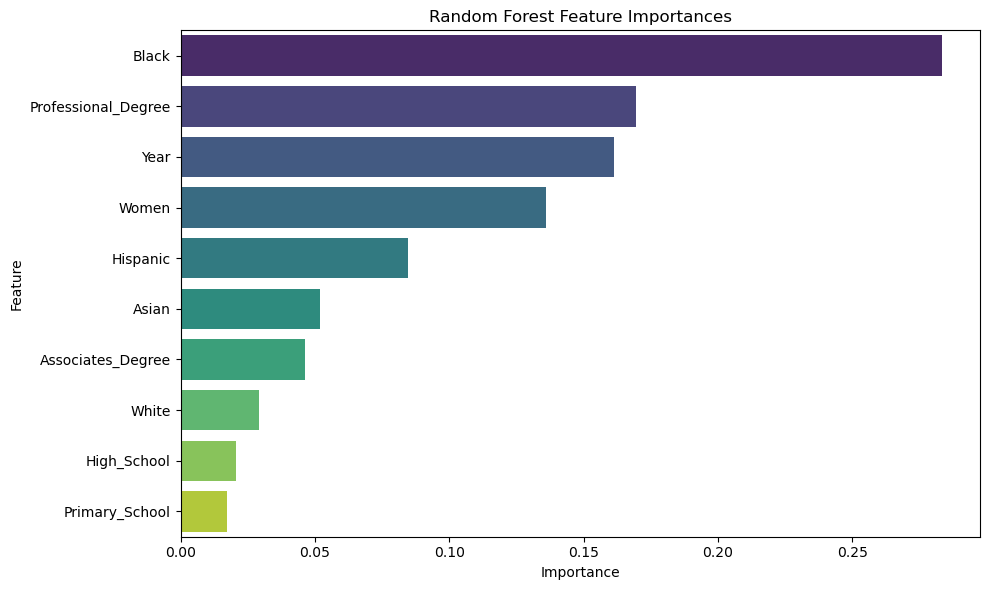

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("unemployment_data_us.csv")

# Create binary classification target based on whether 'Men' unemployment is above median
median_men_unemployment = df["Men"].median()
df["Target"] = (df["Men"] > median_men_unemployment).astype(int)

# Drop non-numeric and unnecessary columns
df_model = df.drop(columns=["Month", "Date", "Men"])

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

# Split features and target
X = df_imputed.drop(columns=["Target"])
y = df_imputed["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"  Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"  Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"  Recall   : {recall_score(y_true, y_pred):.2f}")
    print()

evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Cross-validation scores
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation Accuracy (Decision Tree):", cv_scores_dt.mean())
print("Cross-validation Accuracy (Random Forest):", cv_scores_rf.mean())

# Feature importances (Random Forest)
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", hue="Feature", data=importance_df, palette="viridis", dodge=False, legend=False)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
